# Unit 5 | Assignment - The Power of Plots - Pyber
***
Plot images are stored in the data directory.

## Observable Trends
1. The more rural an area the less drivers available and the less rides occuring.  A smaller less concentrated population than in urban areas may have dificulty in reaching the threshhold of needed rides to sustain enough drivers to service the area.
2. Urban areas have lower average fairs than their more rural counter parts while also having a higher number of drivers.  It may be that having a large number of drivers in a market lowers fares due to competition.
3. A few of the average fare datapoints were much higher for rural areas than there counterparts.  This may be explained by rural riders having farther distances needed to travel.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "./data/city_data.csv"
ride_data_to_load = "./data/ride_data.csv"

In [3]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how='left', on='city')

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
# Collect data for plot 

# Make separate data frame for each city type for ease of data visualization.
# Could also be done with single frame grouped by type.
city_urban = city_ride_data.loc[city_ride_data['type'] == "Urban"]
city_rural = city_ride_data.loc[city_ride_data['type'] == "Rural"]
city_suburban = city_ride_data.loc[city_ride_data['type'] == "Suburban"]

# Number of rides in each type of city by count ride_id per city
rides_urban = city_urban.groupby("city")["ride_id"].count()
rides_rural = city_rural.groupby("city")["ride_id"].count()
rides_suburban = city_suburban.groupby("city")["ride_id"].count()

# Average fair of rides in each type of city by mean of fair per cirty
avg_fare_urban = city_urban.groupby("city")["fare"].mean()
avg_fare_rural = city_rural.groupby("city")["fare"].mean()
avg_fare_suburban = city_suburban.groupby("city")["fare"].mean()

# Number of drivers per city for size of bubble (use mean because value is grouped) by mean of driver count per city
drivers_urban = city_urban.groupby("city")["driver_count"].mean()
drivers_rural = city_rural.groupby("city")["driver_count"].mean()
drivers_suburban = city_suburban.groupby("city")["driver_count"].mean()

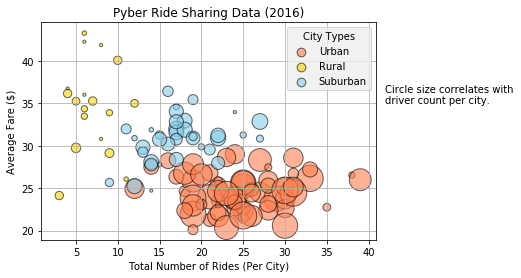

In [6]:
# Plot each of the city type datas
plt.scatter(rides_urban, avg_fare_urban, s = drivers_urban * 10, color = 'coral', edgecolor = 'black', label = 'Urban', alpha = .6)
plt.scatter(rides_rural, avg_fare_rural, s = drivers_rural * 10, color = 'gold', edgecolor = 'black', label = 'Rural', alpha = .6)
plt.scatter(rides_suburban, avg_fare_suburban, s = drivers_suburban * 10, color = 'skyblue', edgecolor = 'black', label = 'Suburban', alpha = .6)

# Show grid
plt.grid()

# Label axis
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Format legend
legend = plt.legend(title= "City Types", loc="best")
frame = legend.get_frame()
frame.set_facecolor('#eeeeee')

# Make legend circles uniform size
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(42,35,"Circle size correlates with\ndriver count per city.", fontsize = 10)

# Save Figure to data folder in local dir
plt.savefig('./data/ride_sharing_analysis.png')

# Display the plot
plt.show()

## Total Fares by City Type

In [7]:
# Collect data for plot, use variables from above: city_urban, city_rural, city_suburban
# Collect sum of fares per city type
sum_fare_urban = city_urban["fare"].sum()
sum_fare_rural = city_rural["fare"].sum()
sum_fare_suburban = city_suburban["fare"].sum()

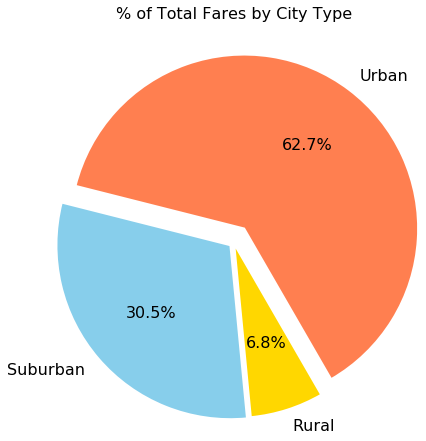

In [8]:
# Format chart for display
labels = ["Urban", "Suburban", "Rural"]
plt.title("% of Total Fares by City Type", fontsize=16,y=1.5)
colors = ["coral", "skyblue", "gold"]
explode = (0.2, .05, .02)

# Slice size based of sum of fares per city type
sizes = [sum_fare_urban, sum_fare_suburban, sum_fare_rural]

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode,radius=2, labels=labels, colors=colors, autopct="%1.1f%%", startangle=300,  textprops={'fontsize': 16}, wedgeprops = {'linewidth': 2, 'edgecolor':'white'})

# Save Figure to data folder in local dir
plt.savefig('./data/total_fares.png', bbox_inches="tight")

# Display the plot
plt.show()

## Total Rides by City Type

In [9]:
# Collect data for plot, use variables from above: city_urban, city_rural, city_suburban
# Collect ride count per city type

ride_count_urban = city_urban["ride_id"].count()
ride_count_rural = city_rural["ride_id"].count()
ride_count_suburban = city_suburban["ride_id"].count()

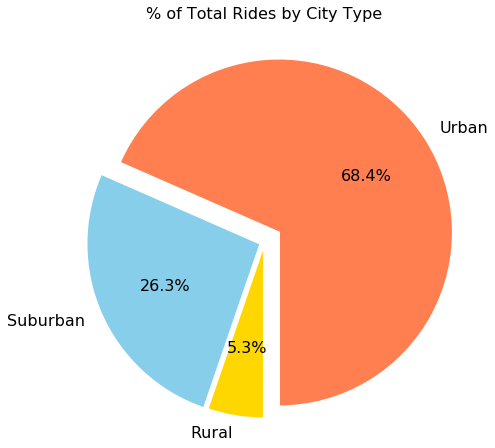

In [10]:
# Format chart for display
labels = ["Urban", "Suburban", "Rural"]
plt.title("% of Total Rides by City Type", fontsize=16,y=1.5)
colors = ["coral", "skyblue", "gold"]
explode = (0.2, .05, .03)


# Slice size based of sum of fares per city type
sizes = [ride_count_urban, ride_count_suburban, ride_count_rural]

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode,radius=2, labels=labels, colors=colors, autopct="%1.1f%%", startangle=270,  textprops={'fontsize': 16}, wedgeprops = {'linewidth': 2, 'edgecolor':'white'})

# Save Figure to data folder in local dir
plt.savefig('./data/total_rides.png', bbox_inches="tight")

# Display the plot
plt.show()

## Total Drivers by City Type

In [11]:
# Collect data for plot, use variables from above: city_urban, city_rural, city_suburban
# Collect driver count per city type

# Grouped by city so take the sum of the means for drivers per city
driver_count_urban = city_urban.groupby("city")["driver_count"].mean().sum()
driver_count_rural = city_rural.groupby("city")["driver_count"].mean().sum()
driver_count_suburban = city_suburban.groupby("city")["driver_count"].mean().sum()


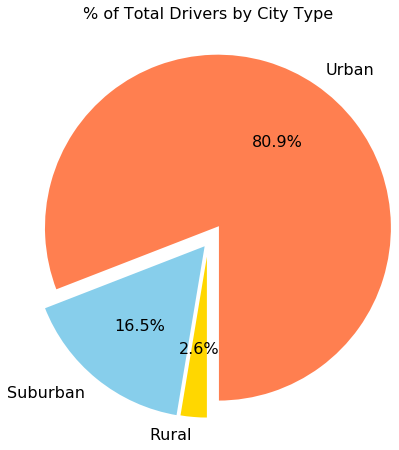

In [12]:
# Format chart for display
labels = ["Urban", "Suburban", "Rural"]
plt.title("% of Total Drivers by City Type", fontsize=16,y=1.5)
colors = ["coral", "skyblue", "gold"]
explode = (0.2, .04, .03)

# Slice size based of sum of fares per city type
sizes = [driver_count_urban, driver_count_suburban, driver_count_rural]

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode,radius=2, labels=labels, colors=colors, autopct="%1.1f%%", startangle=270,  textprops={'fontsize': 16}, wedgeprops = {'linewidth': 2, 'edgecolor':'white'})

# Save Figure to data folder in local dir
plt.savefig('./data/total_drivers.png', bbox_inches="tight")

# Display the plot 
plt.show()